# Trabajo Práctico 3
## Alumno: Julián Stejman

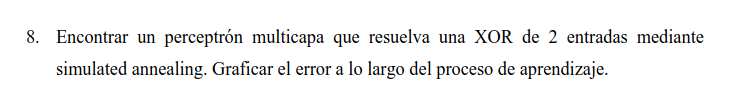

In [4]:
import numpy as np
import matplotlib.pyplot as plt


from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

Para este ejercicio, se utiliza Simulated Annealing para resolver la XOR de 2 entradas, un problema no lineal, que no puede ser resuelto por un perceptrón simple. El aprendizaje a través de simulated annealing es un método de optimización que simula el proceso de enfriamiento de un material en un sistema físico. En este caso, se utiliza para encontrar los pesos que minimizan el error cuadrático medio de la red neuronal. Lo que sucede es que cuando se disminuye la temperatura determina la probabilidad de aceptar una solución peor que la actual a través de una distribución Boltzmann, lo que permite explorar el espacio de soluciones de manera más eficiente. En teoría, el algoritmo converge a la solución óptima, pero en la práctica, se puede quedar atascado en un mínimo local.

In [183]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.bias_output = np.zeros(output_size)
    
    def forward(self, X):
        hidden = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_activation = self.activate(hidden)
        output = np.dot(hidden_activation, self.weights_hidden_output) + self.bias_output
        return self.activate(output)
    
    def activate(self, x):
        return 1 / (1 + np.exp(-x))
    
    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def simulated_annealing(self, X, y, initial_temp=20000, final_temp=0.1, alpha=0.995, max_iter=1000, best=True):
        current_temp = initial_temp
        current_weights_input_hidden = self.weights_input_hidden.copy()
        current_weights_hidden_output = self.weights_hidden_output.copy()
        current_bias_hidden = self.bias_hidden.copy()
        current_bias_output = self.bias_output.copy()
        best_loss = self.compute_loss(y, self.forward(X))
        best_weights_input_hidden = current_weights_input_hidden.copy()
        best_weights_hidden_output = current_weights_hidden_output.copy()
        best_bias_hidden = current_bias_hidden.copy()
        best_bias_output = current_bias_output.copy()
        errors = []
        best_errors = []

        iteration = 0
        while current_temp > final_temp:
            iteration += 1
            for _ in range(max_iter):
                step_size = 1e-1
                new_weights_input_hidden = current_weights_input_hidden + np.random.normal(0, step_size, current_weights_input_hidden.shape)
                new_weights_hidden_output = current_weights_hidden_output + np.random.normal(0, step_size, current_weights_hidden_output.shape)
                new_bias_hidden = current_bias_hidden + np.random.normal(0, step_size, current_bias_hidden.shape)
                new_bias_output = current_bias_output + np.random.normal(0, step_size, current_bias_output.shape)

                self.weights_input_hidden = new_weights_input_hidden
                self.weights_hidden_output = new_weights_hidden_output
                self.bias_hidden = new_bias_hidden
                self.bias_output = new_bias_output

                y_pred = self.forward(X)
                new_loss = self.compute_loss(y, y_pred)
                errors.append(new_loss)

                delta_loss = new_loss - best_loss
                acceptance_probability = np.exp(delta_loss / current_temp) if delta_loss > 0 else 1

                if acceptance_probability > np.random.rand():
                    current_weights_input_hidden = new_weights_input_hidden
                    current_weights_hidden_output = new_weights_hidden_output
                    current_bias_hidden = new_bias_hidden
                    current_bias_output = new_bias_output
                    if new_loss < best_loss:
                        best_loss = new_loss
                        best_weights_input_hidden = new_weights_input_hidden.copy()
                        best_weights_hidden_output = new_weights_hidden_output.copy()
                        best_bias_hidden = new_bias_hidden.copy()
                        best_bias_output = new_bias_output.copy()

                best_errors.append(best_loss)
            current_temp *= alpha

            if iteration % 10 == 0:
                print(f"Iteration {iteration}, Temperature {current_temp:.2f}, Best Loss {best_loss:.6f}, Current Loss {new_loss:.6f}")

        if best:
            self.weights_input_hidden = best_weights_input_hidden
            self.weights_hidden_output = best_weights_hidden_output
            self.bias_hidden = best_bias_hidden
            self.bias_output = best_bias_output
        else:
            self.weights_input_hidden = current_weights_input_hidden
            self.weights_hidden_output = current_weights_hidden_output
            self.bias_hidden = current_bias_hidden
            self.bias_output = current_bias_output

        return best_errors, errors


Se propone un algoritmo de simulated annealing para resolver la XOR de 2 entradas. Se utiliza una red neuronal con 2 entradas, 2 neuronas en la capa oculta y 1 neurona en la capa de salida. Se inicializan los pesos aleatoriamente y se calcula el error cuadrático medio. Luego, se actualizan los pesos de manera aleatoria y se calcula el nuevo error cuadrático medio. Si el nuevo error es menor que el anterior, se acepta la solución. Si el nuevo error es mayor que el anterior, se acepta la solución con una probabilidad determinada por la temperatura y la diferencia de error. Se repite este proceso hasta que se alcance un número máximo de iteraciones o se alcance un error mínimo. Además se ha propuesto un criterio de conservar los pesos sinápticos más óptimos de la corrida tal que se pueda utilizar la configuración más óptima obtenida.

Iteration 10, Temperature 198.01, Best Loss 0.068077, Current Loss 0.435235
Iteration 20, Temperature 196.04, Best Loss 0.068077, Current Loss 0.499555
Iteration 30, Temperature 194.09, Best Loss 0.068077, Current Loss 0.499954
Iteration 40, Temperature 192.15, Best Loss 0.068077, Current Loss 0.494845
Iteration 50, Temperature 190.24, Best Loss 0.068077, Current Loss 0.500000
Iteration 60, Temperature 188.35, Best Loss 0.068077, Current Loss 0.253198
Iteration 70, Temperature 186.47, Best Loss 0.068077, Current Loss 0.499878
Iteration 80, Temperature 184.62, Best Loss 0.068077, Current Loss 0.256191
Iteration 90, Temperature 182.78, Best Loss 0.068077, Current Loss 0.250000
Iteration 100, Temperature 180.96, Best Loss 0.068077, Current Loss 0.367783
Iteration 110, Temperature 179.16, Best Loss 0.038360, Current Loss 0.050587
Iteration 120, Temperature 177.37, Best Loss 0.001438, Current Loss 0.245910
Iteration 130, Temperature 175.61, Best Loss 0.000005, Current Loss 0.322447
Iteratio

/tmp/ipykernel_318702/4153003468.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration 4240, Temperature 2.88, Best Loss 0.000005, Current Loss 0.500000
Iteration 4250, Temperature 2.85, Best Loss 0.000005, Current Loss 0.500000
Iteration 4260, Temperature 2.82, Best Loss 0.000005, Current Loss 0.500000
Iteration 4270, Temperature 2.79, Best Loss 0.000005, Current Loss 0.500000
Iteration 4280, Temperature 2.76, Best Loss 0.000005, Current Loss 0.500000
Iteration 4290, Temperature 2.74, Best Loss 0.000005, Current Loss 0.500000
Iteration 4300, Temperature 2.71, Best Loss 0.000005, Current Loss 0.500000
Iteration 4310, Temperature 2.68, Best Loss 0.000005, Current Loss 0.500000
Iteration 4320, Temperature 2.65, Best Loss 0.000005, Current Loss 0.500000
Iteration 4330, Temperature 2.63, Best Loss 0.000005, Current Loss 0.500000
Iteration 4340, Temperature 2.60, Best Loss 0.000005, Current Loss 0.500000
Iteration 4350, Temperature 2.58, Best Loss 0.000005, Current Loss 0.500000
Iteration 4360, Temperature 2.55, Best Loss 0.000005, Current Loss 0.500000
Iteration 43

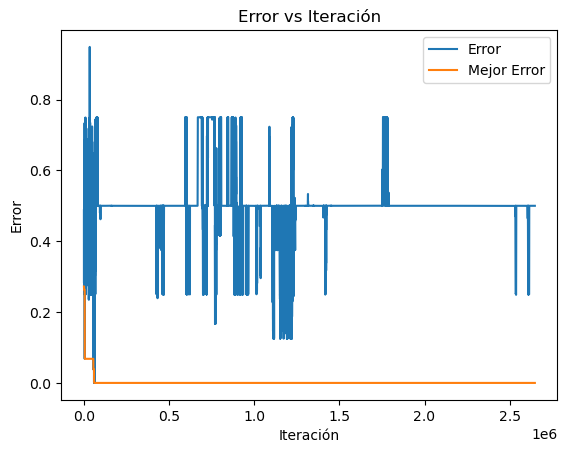

Predicciones:
Input: [0 0], Predecido: 0.0030, Esperado: 0
Input: [0 1], Predecido: 1.0000, Esperado: 1
Input: [1 0], Predecido: 1.0000, Esperado: 1
Input: [1 1], Predecido: 0.0034, Esperado: 0


In [ ]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])
mlp = MLP(input_size=2, hidden_size=6, output_size=1)

best_errors, errors = mlp.simulated_annealing(
    X, y,
    initial_temp=200,
    final_temp=1,
    alpha=0.999,
    best = True
)
plt.plot(errors)
plt.plot(best_errors)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.legend(['Error', 'Mejor Error'])
plt.title('Error vs Iteración')
plt.show()

outputs = mlp.forward(X)
print("Predicciones:")
for input_data, output, target in zip(X, outputs, y):
    print(f"Input: {input_data}, Predecido: {output[0]:.4f}, Esperado: {target[0]}")

Se puede ver como el error real tiene saltos bruscos al principio y luego se estabiliza. Esto se debe a que el algoritmo de simulated annealing explora el espacio de soluciones de manera aleatoria y no determinista, lo que puede llevar a soluciones subóptimas. Sin embargo, en este caso, el algoritmo converge a una solución que no es la más óptima, pero como se guarda la mejor configuración de pesos, se puede utilizar para predecir la salida de la red neuronal con una precisión aceptable.

1. Construya una red de Kohonen de 2 entradas que aprenda una distribución uniforme
dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con
distribuciones uniformes dentro de otras figuras geométricas.

Para construir la red Kohonen, o el mapa auto-organizado, se declara la clase SOM que contiene los métodos necesarios para entrenar la red y visualizar los resultados. Se inicializan los pesos de manera aleatoria y se actualizan de acuerdo a la distancia euclidiana o distancia circular entre el vector de entrada y el vector de peso. Se utiliza un factor de aprendizaje que disminuye con el tiempo y un radio que se reduce con el tiempo. Se entrena la red con una distribución uniforme dentro del círculo unitario y se visualiza el mapa de preservación de topología. Luego, se prueba con distribuciones uniformes dentro de otras figuras geométricas, como el cuadrado y el triángulo, y se visualizan los resultados.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, input_dimension, num_neurons, initial_radius, learning_rate, decay_rate, min_radius):
        self.input_dimension = input_dimension
        self.num_neurons = num_neurons
        self.radius = initial_radius
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.min_radius = min_radius
        self.weights = np.random.uniform(-0.01, 0.01, (num_neurons, input_dimension))
        self.grid_size = int(math.sqrt(num_neurons))  # Tamaño de la cuadrícula

    def train(self, training_data, circular=False):

        while self.radius > self.min_radius:
            np.random.shuffle(training_data)
            
            for input_vector in training_data:
                distances = np.array([np.sqrt(np.sum((input_vector - w)**2)) for w in self.weights])
                winner_idx = np.argmin(distances)
                
                if circular:
                    # Topología circular
                    neighborhood = self._calculate_circular_neighborhood(winner_idx)
                else:
                    # Topología de cuadriculada
                    neighborhood = self._calculate_grid_neighborhood(winner_idx)
                
                self._update_weights(input_vector, neighborhood)
            
            self.radius -= self.radius * self.decay_rate
            
        return self.weights
    
    def _calculate_circular_neighborhood(self, winner_idx):
        angles = np.array([[math.sin(2*math.pi/self.num_neurons*i), 
                           math.cos(2*math.pi/self.num_neurons*i)] 
                          for i in range(self.num_neurons)])
        winner_angle = angles[winner_idx]
        
        distances = np.sqrt(np.sum((angles - winner_angle)**2, axis=1))
        return np.exp(-distances**2 / (2 * self.radius**2))
    
    def _calculate_grid_neighborhood(self, winner_idx):
        winner_pos = np.array([winner_idx // self.grid_size, winner_idx % self.grid_size])
        
        neighborhood = np.array([[np.exp(-np.sum((np.array([i, j]) - winner_pos)**2) / 
                                       (2 * self.radius**2))
                                for j in range(self.grid_size)]
                               for i in range(self.grid_size)])
        
        return neighborhood.flatten()
    
    def _update_weights(self, input_vector, neighborhood):
        for i in range(self.num_neurons):
            self.weights[i] += (self.learning_rate * neighborhood[i] * 
                              (input_vector - self.weights[i]))

In [44]:
N = 100
M = int(math.sqrt(N))
x = np.random.uniform(-1, 1, N)
y = np.array([np.random.uniform(-math.sqrt(1 - v**2), math.sqrt(1 - v**2)) for v in x ])
circle_arr = np.array([[x[i], y[i]] for i in range(N)])

som = SOM(2, 15*15, 10, 0.1, 0.01, 0.01)
W = som.train(circle_arr)

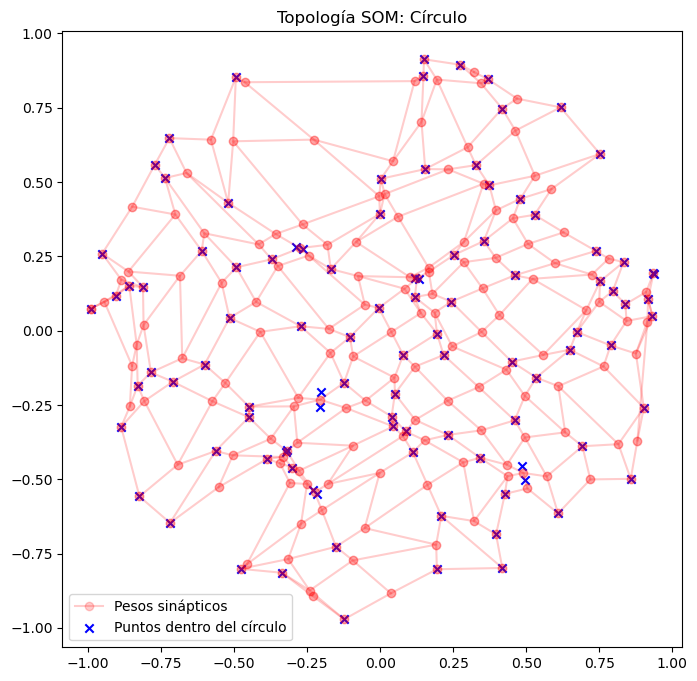

In [203]:
plt.figure(figsize=(8, 8))
plt.plot(W[:, 0].reshape(15, 15), W[:, 1].reshape(15, 15), c='red', marker='o', alpha=0.2)
plt.plot(np.transpose(W[:, 0].reshape(15, 15)), np.transpose(W[:, 1].reshape(15, 15)), c='red', marker='o', alpha=0.2)
plt.plot(W[0, 0], W[0, 1], c='red', marker='o', alpha=0.2, label = 'Pesos sinápticos')
plt.scatter(circle_arr[:, 0], circle_arr[:, 1], c='blue', marker='x', label='Puntos dentro del círculo')
plt.title("Topología SOM: Círculo")
plt.legend()
plt.show()

In [ ]:
def generate_points_in_triangle(num_points):
    points = []
    for _ in range(num_points):
        r1, r2 = np.random.rand(2)
        if r1 + r2 > 1:
            r1, r2 = 1 - r1, 1 - r2
        x = r1
        y = r2 * (np.sqrt(3) / 2)
        points.append([x, y])
    return np.array(points)

num_points = 100
triangle_points = generate_points_in_triangle(num_points)
som2 = SOM(2, 15*15, 10, 0.1, 0.01, 0.01)
W2 = som2.train(triangle_points)


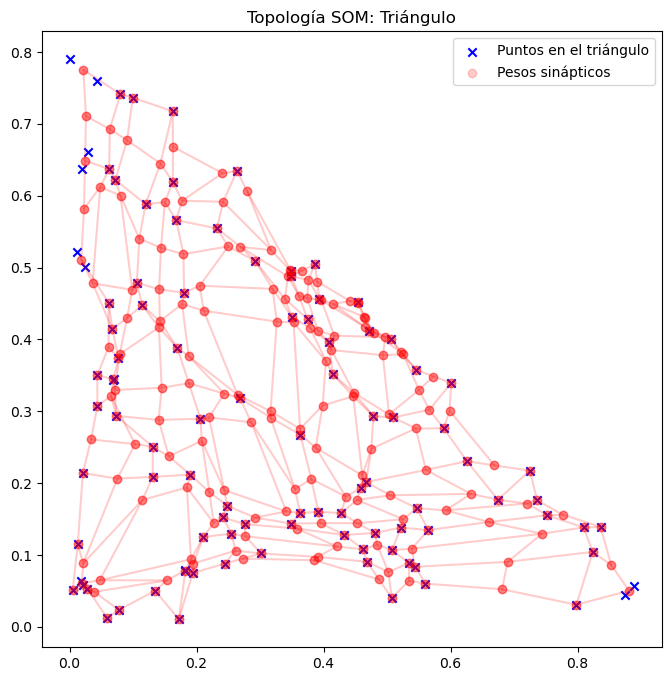

In [207]:
plt.figure(figsize=(8, 8))
plt.scatter(triangle_points[:, 0], triangle_points[:, 1], c='blue', marker='x', label='Puntos en el triángulo')
plt.plot(W2[:, 0].reshape(15, 15), W2[:, 1].reshape(15, 15), c='red', marker='o', alpha=0.2)
plt.scatter(W2[:, 0].reshape(15, 15), W2[:, 1].reshape(15, 15), c='red', marker='o', alpha=0.2, label = 'Pesos sinápticos')
plt.plot(np.transpose(W2[:, 0].reshape(15, 15)), np.transpose(W2[:, 1].reshape(15, 15)), c='red', marker='o', alpha=0.2)
plt.title("Topología SOM: Triángulo")
plt.legend()
plt.show()


In [194]:
num_points = 100
square_points = np.random.rand(num_points, 2)
som3 = SOM(2, 15*15, 10, 0.1, 0.01, 0.01)
W3 = som3.train(square_points)


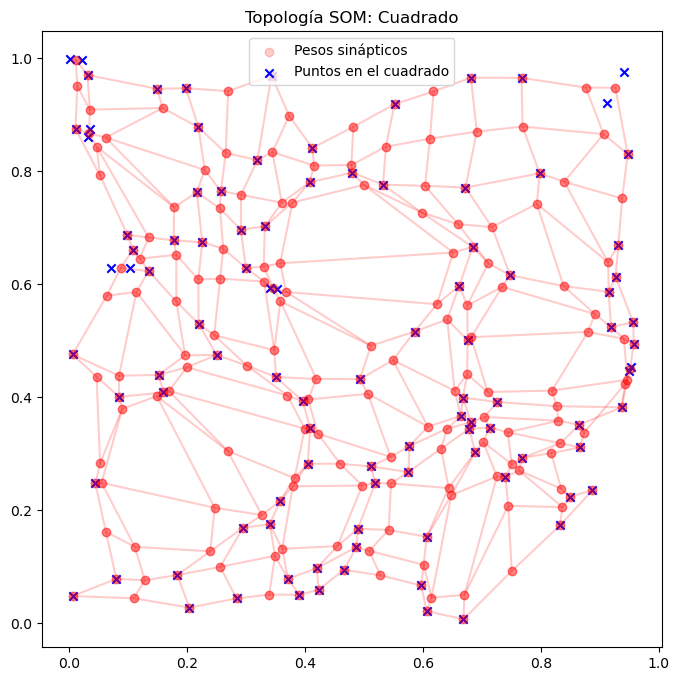

In [208]:
plt.figure(figsize=(8, 8))
plt.plot(W3[:, 0].reshape(15, 15), W3[:, 1].reshape(15, 15), c='red', marker='o', alpha=0.2)
plt.plot(np.transpose(W3[:, 0].reshape(15, 15)), np.transpose(W3[:, 1].reshape(15, 15)), c='red', marker='o', alpha=0.2)
plt.scatter(W3[:, 0].reshape(15, 15), W3[:, 1].reshape(15, 15), c='red', marker='o', alpha=0.2, label = 'Pesos sinápticos')
plt.scatter(square_points[:, 0], square_points[:, 1], c='blue', marker='x', label='Puntos en el cuadrado')
plt.title("Topología SOM: Cuadrado")
plt.legend()
plt.show()


Se puede ver que para estas redes, se acomodan los pesos sinápticos al rededor de los puntos de entrada. Además se puede ver como preserva la topología de los datos de entrada, es decir, los puntos que están cerca en el espacio de entrada, están cerca en el espacio de salida. Esto se debe a que la red Kohonen es una red auto-organizada que aprende la distribución de los datos de entrada y los agrupa en regiones similares. 

2. Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con
una red de Kohonen

Para este ejercicio simplemente se genera una red de Kohonen de la que se entrenará con una función de vecindad circular para poder terminar e iniciar el recorrido en el mismo punto. Para 200 ciudades, se propone como criterio utilizar el doble de neuronas que la cantidad de puntos necesarios adecuarse simplemente para que cada ciudad o punto tuviese su propio peso sináptico asociado a sí mismo. Se puede ver como la red de Kohonen se acomoda a los puntos de entrada y se puede visualizar el recorrido óptimo a través de las ciudades. Sin embargo, se puede ver que la solución no es la más óptima, ya que la red Kohonen no es un algoritmo de optimización, sino de agrupamiento. Por lo tanto, se puede utilizar la red Kohonen para encontrar una solución aproximada al problema del vendedor viajero, pero no la solución óptima.

In [5]:
num_cities = 200
cities = np.random.uniform(0, 1, size=(num_cities, 2))
som2 = SOM(2, 2*num_cities, 10, 0.1, 0.01, 0.01)
W_2 = som2.train(cities, circular=True)

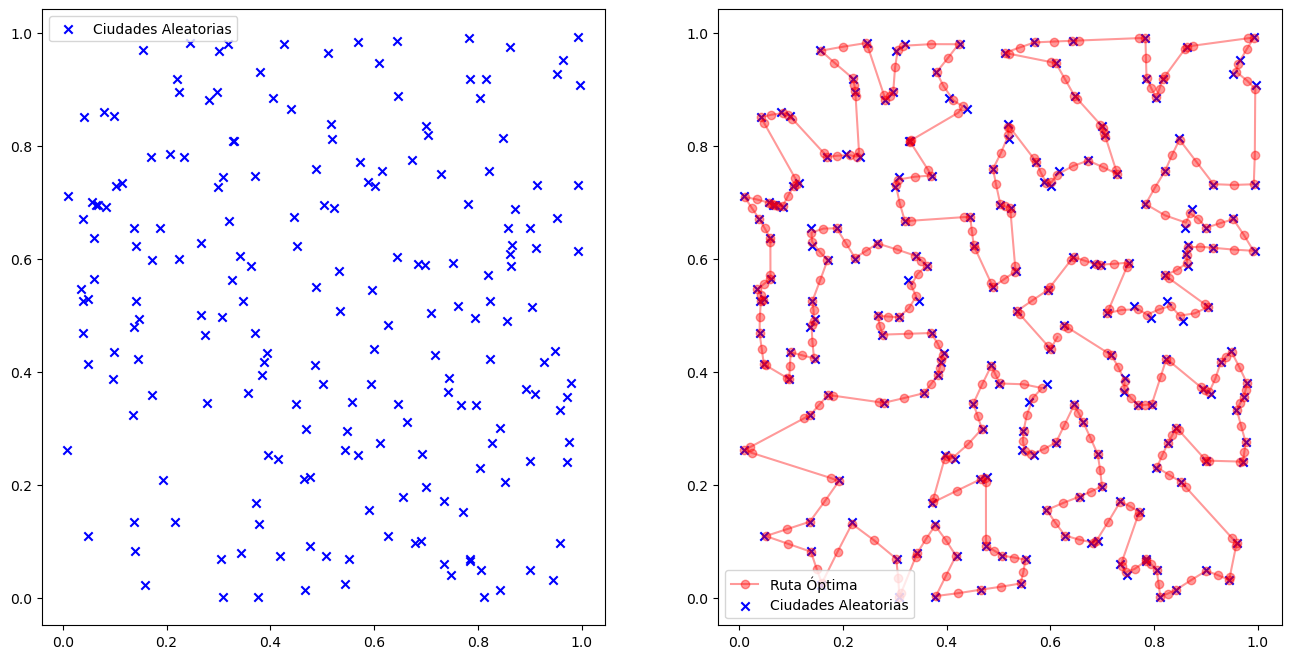

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(cities[:, 0], cities[:, 1], c='blue', marker='x', label='Ciudades Aleatorias')
axes[0].legend()
axes[1].plot(W_2[:, 0], W_2[:, 1], c='red', marker='o', alpha=0.4, label='Ruta Óptima')
axes[1].scatter(cities[:, 0], cities[:, 1], c='blue', marker='x', label='Ciudades Aleatorias')
axes[1].legend()

plt.show()